In [12]:
from scipy.io import loadmat

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = loadmat("data/monkeydata.mat")['trial']
data.shape

(100, 8)

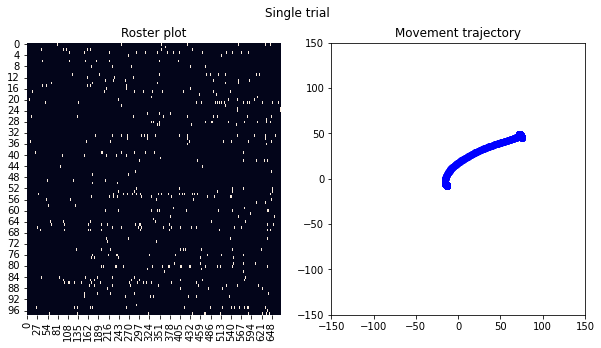

In [31]:
plt.figure(figsize=(10, 5))
plt.suptitle("Single trial")

plt.subplot(1, 2, 1)
plt.title("Roster plot")
sns.heatmap(data[0][0][1], cbar=False)

plt.subplot(1, 2, 2)
plt.title("Movement trajectory")
plt.xlim([-150, 150])
plt.ylim([-150, 150])
plt.plot(data[0][0][2][0, :], data[0][0][2][1, :], 'bo--')

# origin = plt.Circle((0, 0), 1, color='r')
# plt.gca().add_patch(origin)

plt.show()

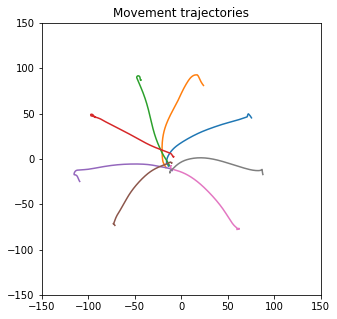

In [34]:
plt.figure(figsize=(5, 5))

plt.title("Movement trajectories")
plt.xlim([-150, 150])
plt.ylim([-150, 150])

for i in range(8):
    plt.plot(data[0][i][2][0, :], data[0][i][2][1, :])

# origin = plt.Circle((0, 0), 1, color='r')
# plt.gca().add_patch(origin)

plt.show()

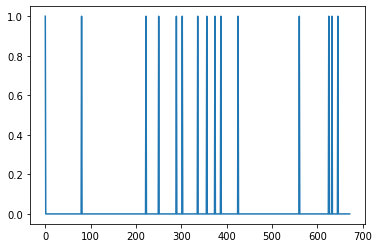

In [36]:
plt.plot(data[0][0][1][0])

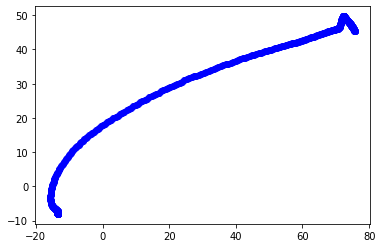

In [37]:
plt.plot(data[0][0][2][0, :], data[0][0][2][1, :], 'bo--')